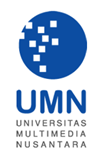
<center>
    <h3>UJIAN AKHIR SEMESTER GENAP TAHUN AKADEMIK 2022/2023</h3>
    <h3>PROGRAM STUDI INFORMATIKA</h3>
    <h3>FAKULTAS TEKNIK DAN INFORMATIKA</h3>
    <h3>UNIVERSITAS MULTIMEDIA NUSANTARA</h3>

<hr/>

<h3 style='color:blue'>IF420 - Analisis Numerik</h3>

<hr/>
</center>

<b>Petunjuk:</b>
<ul>
    <li>Gunakan file template jawaban UAS ini untuk <b>SOAL B</b></li>
    <li>Setiap butir pertanyaan memiliki bobot penilaiannya masing-masing</li>
    <li>Usahakan untuk mengerjakan setiap butir pertanyaan sesuai dengan perintah yang diberikan dan di tempat yang disediakan</li>
    <li>Tulis nama dan NIM Anda di dalam blok cell di bawah ini! Tampilkan dengan perintah print!</li>
</ul>

In [2]:
# input nama dan nim Anda di sini, lalu tampilkan dengan perintah print
nama = 'Arvin Winardi'
nim = '00000058607'
print(f'Nama:\n {nama}')
print(f'NIM:\n {nim}')

Nama:
 Arvin Winardi
NIM:
 00000058607


<u><h3>SOAL 1 (Total Bobot: 20%)</h3></u>

<h4>Soal 1 A (Bobot: 10%)</h4>
Buatlah sebuah fungsi <b>my_num_diff_w_smoothing(x,y,n)</b> dengan output [dy, X], dimana x dan y adalah 1D numpy array dengan panjang yang sama dan n adalah suatu bilangan bulat positif.<br/>
Pertama, fungsi tersebut akan membuat sebuah vektor yang terdiri atas titik-titik data y yang telah diperhalus (smoothed) dengan menerapkan formula
<center>
$ysmooth[i] = np.mean(y[i-n:i+n])$
</center>
Selanjutnya, fungsi tersebut akan menghitung dy, yakni turunan dari vektor y-smoothed tersebut dengan menggunakan metode <b>central difference</b>. Selain mengembalikan dy, fungsi tersebut juga akan mengembalikan output berupa 1D array X yang memiliki ukuran panjang yang sama dengan dy dan merepresentasikan nilai-nilai x dimana dy berlaku.<br/>
Asumsikan bahwa data x berada dalam urutan naik tanpa ada dua nilai yang sama (tidak ada duplikasi) dan elemen-elemen x bisa jadi tidak memiliki jarak yang sama satu dengan lainnya. Perhatikan bahwa output dy akan memiliki 2n+2 titik lebih sedikit daripada y, serta asumsikan bahwa panjang dari y jauh lebih besar daripada 2n+2.

In [1]:
# my_num_diff_w_smoothing function (Max Points: 10%)
# import all needed libraries
import numpy as np
import matplotlib.pyplot as plt

def my_num_diff_w_smoothing(x, y, n):
    # Smooth the y values
    ysmooth = np.zeros(len(y))
    for i in range(n, len(y) - n):
        ysmooth[i] = np.mean(y[i - n:i + n + 1])

    # Calculate dy using central difference
    dy = np.zeros(len(y) - 2 * n)
    for i in range(n, len(y) - n):
        dy[i - n] = (ysmooth[i + n] - ysmooth[i - n]) / (x[i + n] - x[i - n])

    # Create X array
    X = x[n:len(x) - n]

    return dy, X

<h4>Soal 1 B (Bobot: 10%)</h4>
Lakukan pengecekan terhadap fungsi yang telah dibuat dengan nilai x, y, dan n yang didefinisikan sebagai berikut:<br/>

$x = np.linspace(0, 2*np.pi, 100)$

$y = np.sin(x) + np.random.randn(len(x))/100$

$n = 4$

Plot hasilnya untuk solusi fungsi tersebut serta bandingkan dengan plot turunan fungsi tersebut secara analitik, yakni <b>dy = np.cos(x)</b>

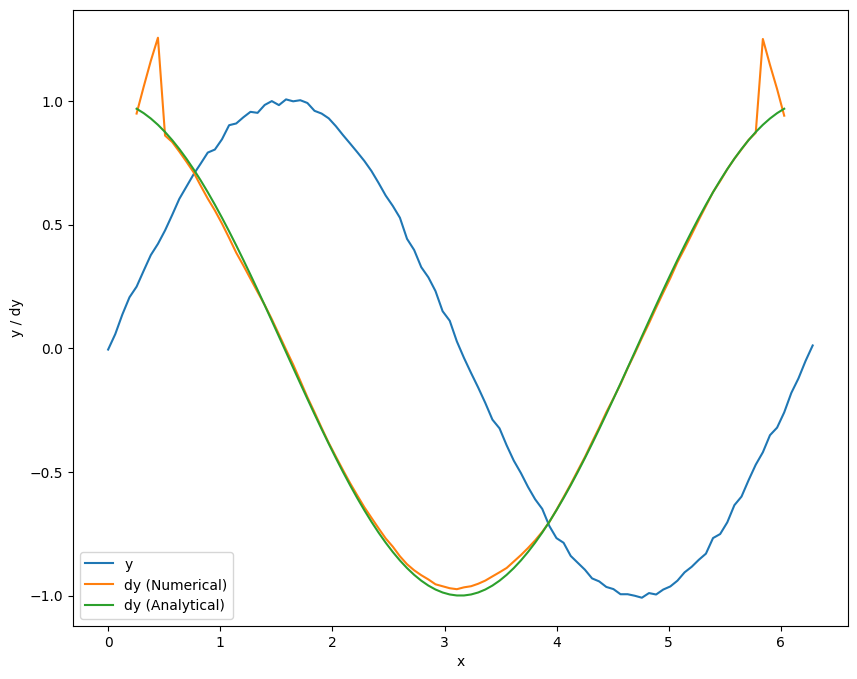

In [3]:
# test case (Max Points: 5%)
# put your codes here
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
n = 4

# Calculate dy using the function
dy, X = my_num_diff_w_smoothing(x, y, n)

# Analytical derivative dy = np.cos(x)
dy_analytical = np.cos(x[n:len(x) - n])

# plot the estimation and analytic results (Max Points: 5%)
# put your codes here
plt.figure(figsize=(10, 8))
plt.plot(x, y, label='y')
plt.plot(X, dy, label='dy (Numerical)')
plt.plot(x[n:len(x) - n], dy_analytical, label='dy (Analytical)')
plt.xlabel('x')
plt.ylabel('y / dy')
plt.legend()
plt.show()


<u><h3>SOAL 2 (Total Bobot: 10%)</h3></u>

Hitunglah nilai integral dari fungsi <b>cos(x)</b> pada interval <b>0</b> hingga <b>2*np.pi</b>.<br/>
Selanjutnya, hitunglah perkiraan integral kumulatif dari fungsi cos(x) tersebut dan plot hasil perkiraannya beserta hasil fungsi analitiknya, yakni <b>sin(x)</b><br/>
Anda dapat menggunakan fungsi <b>quad</b> dan <b>cumtrapz</b> yang tersedia dalam module <b>scipy.integrate</b>

Nilai integral: 4.3598356225107897e-16


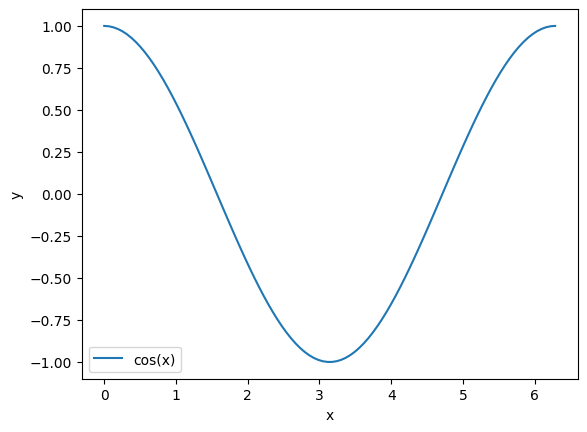

In [11]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# define function
def f(x):
    return np.cos(x)

# use quad function to calculate the integral and print the result (Max Points: 5%)
integral_value, error = quad(f, 0, 2*np.pi)
print("Nilai integral:", integral_value)

# use cumtrapz function to get the cumulative integral and 
# plot the results compare with the analytic ones (Max Points: 5%)
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)
plt.plot(x, y, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<u><h3>SOAL 3 (Total Bobot: 20%)</h3></u>

Persamaan diferensial $\frac{df(t)}{dt}=cos(t)$ dengan kondisi awal $f_0=0$ memiliki solusi exact $f(t)=sin(t)$.
Carilah perkiraan solusi terhadap permasalahan nilai awal ini di antara 0 hingga $np.pi$ dengan kenaikan langkah sebesar 0.05 menggunakan dua pendekatan, yakni:
<ul>
    <li>Explicit Euler Method</li>
    <li>Fungsi built-in <b>solve_ivp</b> yang tersedia dalam module scipy.integrate</li>
</ul>
Selanjutnya, plot hasil perkiraannya baik dengan metode <b>eksplisit Euler</b> maupun dengan <b>solve_ivp</b> serta solusi <b>exact</b>-nya di dalam satu canvas gambar yang sama.

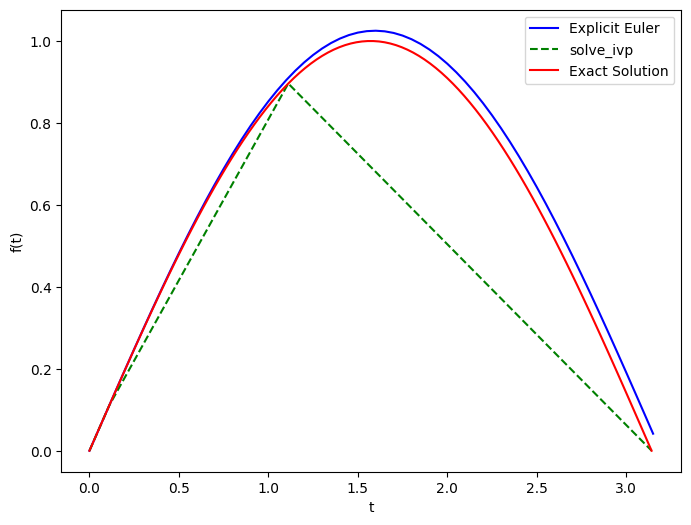

In [12]:
# import libraries and define initial parameters (Max Points: 5%)
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(t, y):
    return np.cos(t)

def exact_solution(t):
    return np.sin(t)

# Explicit Euler Method (Max Points: 5%)
def explicit_euler(f, t_span, y0, h):
    t_start, t_end = t_span
    t = np.arange(t_start, t_end + h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n - 1):
        y[i + 1] = y[i] + h * f(t[i], y[i])
    return t, y

# Menggunakan Explicit Euler Method
t_span = (0, np.pi)
y0 = 0
h = 0.05
t_explicit, y_explicit = explicit_euler(f, t_span, y0, h)

# using built-in function - solve_ivp (Max Points: 5%)
sol = solve_ivp(f, t_span, [y0], dense_output=True)
t_solve, y_solve = sol.t, sol.y[0]

t_exact = np.linspace(t_span[0], t_span[1], 100)
y_exact = exact_solution(t_exact)

# plot the results - exact solution, approx with Explicit Euler, approx with solve_ivp (Max Points: 5%)
plt.figure(figsize=(8, 6))
plt.plot(t_explicit, y_explicit, 'b-', label='Explicit Euler')
plt.plot(t_solve, y_solve, 'g--', label='solve_ivp')
plt.plot(t_exact, y_exact, 'r-', label='Exact Solution')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

<u><h3>SOAL 4 (Total Bobot: 10%)</h3></u>

Gunakan metode Finite Difference untuk menyelesaikan permasalahan nilai batas linear berikut: $y^"+0.5x^2-6x=0$ dengan kondisi batas $y(0)=0$ dan $y(12)=0$. Ambil $n=6$.<br/>
Plot hasilnya bersama dengan kondisi batas yang diberikan!

[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.]]
[ 0. 40. 64. 72. 64. 40.  0.]


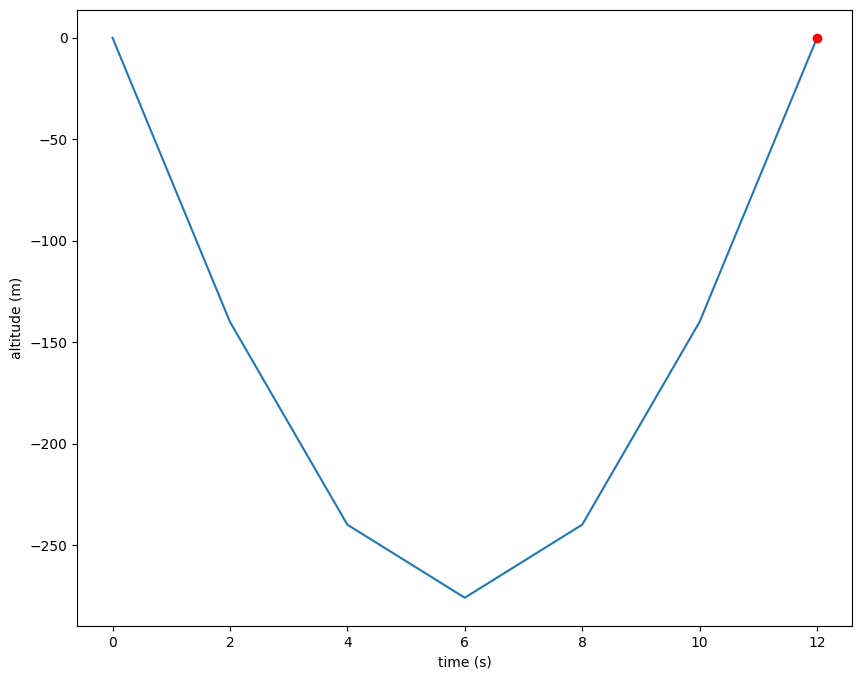

In [10]:
# initial parameters
n = 6
h = (12-0) / n
x = np.linspace(0, 12, n+1)

# Get A (Max Points: 5%)
# put your codes here
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1

for i in range(1, n):
  A[i, i-1] = 1
  A[i, i] = -2
  A[i, i+1] = 1
print(A)

# Get b (Max Points: 5%)
# put your codes here
b = np.zeros(n+1)
b[0] = 0
b[1:-1] = (-0.5*x[1:-1]**2 +6*x[1:-1])*h**2
b[-1] = 0
print(b)

# solve the linear equations (Max Points: 5%)
# put your codes here
y = np.linalg.solve(A, b)
t = np.linspace(0, 12, 7)

# plot the results (Max Points: 5%)
# put your codes here
plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(12, 0, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()







<u><h3>Soal 5 (Bobot: 20%)</h3></u>

<h4>Soal 5 A (Bobot: 10%)</h4>
Bangkitkan tiga sinyal berikut:<br/>
Sinyal 1 adalah gelombang sinus dengan 5 Hz, amplitude 3 dan phase shift 3,<br/>
Sinyal 2 adalah gelombang sinus dengan 2 Hz, amplitude 2 dan phase shift -2,<br/>
Sinyal 3 adalah gelombang sinus dengan 4 Hz, amplitude 0.5 dan phase shift 2.<br/>
Tambahkan ketiga gelombang ini bersama dengan sampling rate 64 Hz dan plot hasil gabungannya untuk 2 detik.

In [ ]:
# generate the combined signals (Max Points: 10%)
# put your codes here
import matplotlib.pyplot as plt
import numpy as np

sr = 100
ts = 1.0/sr
t = np.arange(0,2,ts)

freq = 5
x = 3*np.sin(2*np.pi*freq*t+3)

freq = 2
x += 2*np.sin(2*np.pi*freq*t-2)

freq = 4
x += 0.5*np.sin(2*np.pi*freq*t+2)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()




<h4>Soal 5 B (Bobot: 10%)</h4>
Tulis kembali fungsi <b>Fast Fourier Transform/ FFT(x)</b> yang telah kita bahas di pertemuan terakhir kelas. Fungsi tersebut akan menghitung FFT dari sinyal yang ada dan mengembalikan nilai-nilai FFT-nya.<br/>
Terapkan fungsi FFT ini untuk sinyal yang baru saja kita buat di soal 5 A dan plot hasilnya!

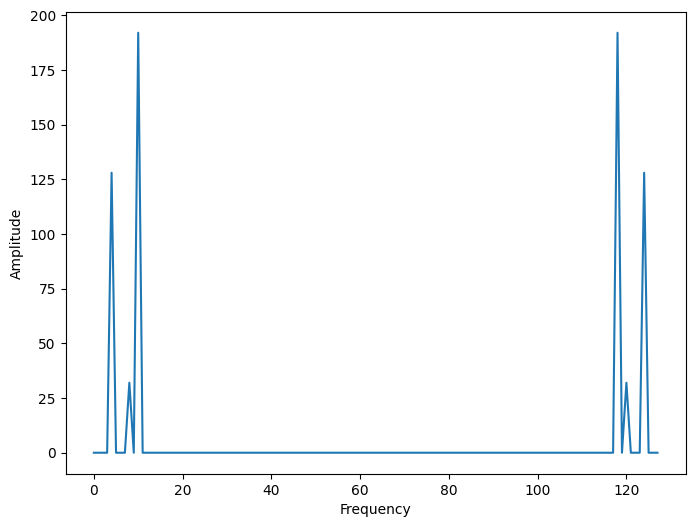

In [9]:
import numpy as np

def FFT(x):
    N = len(x)
    if N <= 1:
        return x
    even = FFT(x[0::2])
    odd = FFT(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([even + factor[:N//2] * odd, even + factor[N//2:] * odd])

sr = 64
ts = 1.0/sr
t = np.arange(0, 2, ts)

freq1 = 5
x1 = 3*np.sin(2*np.pi*freq1*t+3)

freq2 = 2
x2 = 2*np.sin(2*np.pi*freq2*t-2)

freq3 = 4
x3 = 0.5*np.sin(2*np.pi*freq3*t+2)

x = x1 + x2 + x3

fft_result = FFT(x)

# plot the results (Max Points: 5%)
# put your codes here
plt.figure(figsize=(8, 6))
plt.plot(np.abs(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

    

In [ ]:
# plot the results (Max Points: 5%)
# put your codes here


















